In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
passageiros = pd.read_csv('/content/Passageiros.csv')
passageiros.head(6)

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135


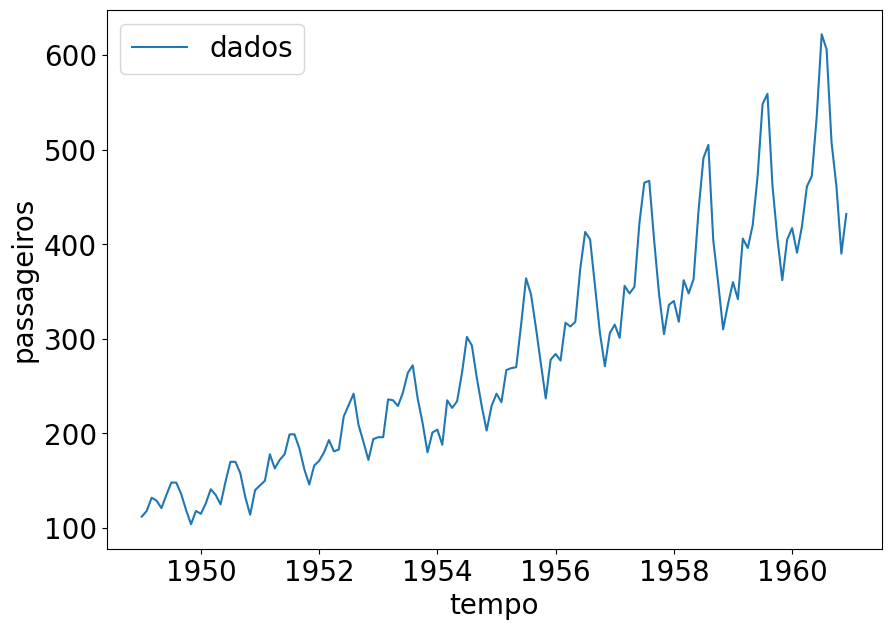

In [7]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 20

sns.lineplot(x='tempo', y='passageiros', data=passageiros, label ='dados');

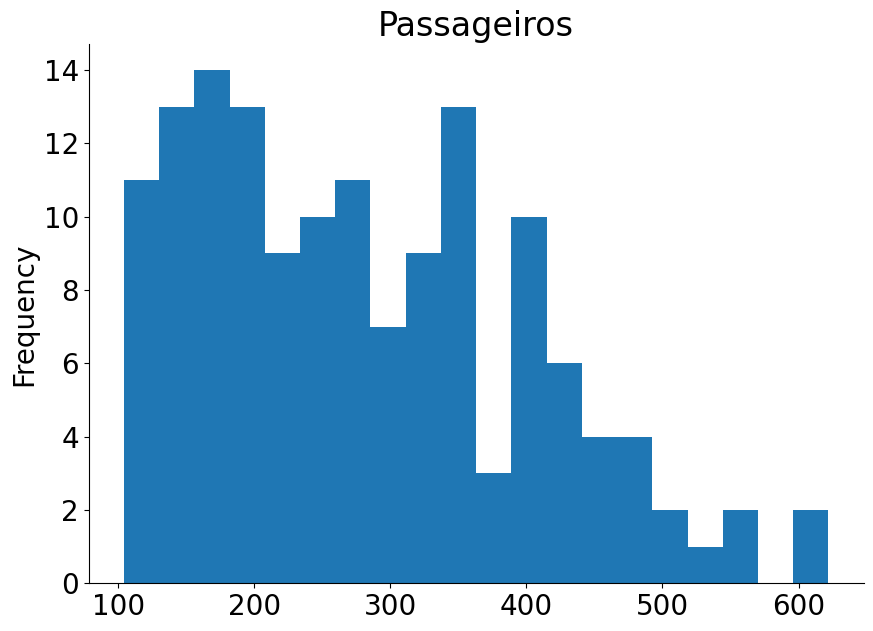

In [8]:
passageiros['passageiros'].plot(kind='hist', bins=20, title='Passageiros')
plt.gca().spines[['top', 'right',]].set_visible(False)

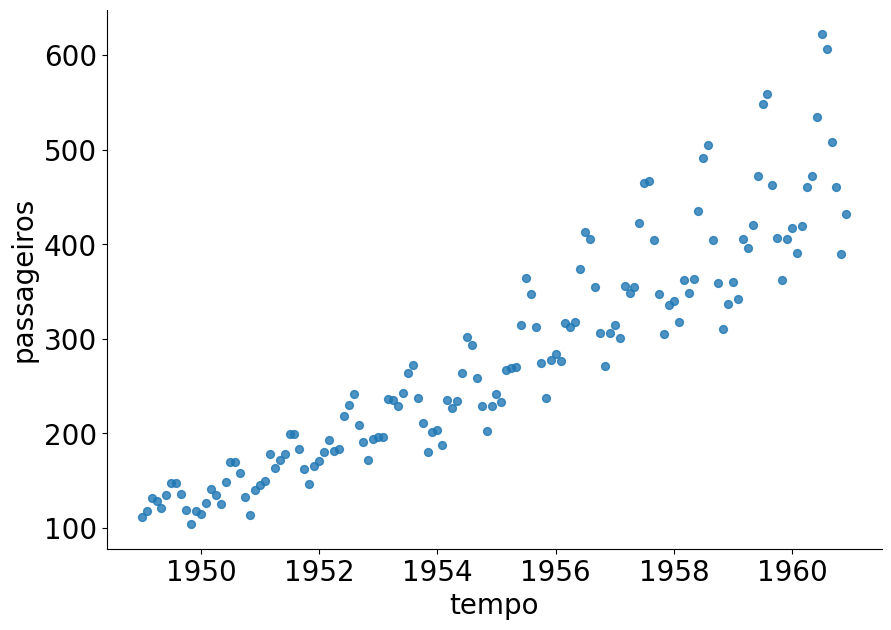

In [9]:
passageiros.plot(kind='scatter', x='tempo', y='passageiros', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
sc = StandardScaler()
sc.fit(passageiros)
scaled = sc.transform(passageiros)
x = scaled[:, 0]
y = scaled[:, 1]
x, y

(array([-1.72006415, -1.69600731, -1.67195047, -1.64789363, -1.62383679,
        -1.59977995, -1.5757231 , -1.55166626, -1.52760942, -1.50355258,
        -1.47949574, -1.4554389 , -1.43138206, -1.40732522, -1.38326837,
        -1.35921153, -1.33515469, -1.31109785, -1.28704101, -1.26298417,
        -1.23892733, -1.21487049, -1.19081364, -1.1667568 , -1.14269996,
        -1.11864312, -1.09458628, -1.07052944, -1.0464726 , -1.02241576,
        -0.99835891, -0.97430207, -0.95024523, -0.92618839, -0.90213155,
        -0.87807471, -0.85401787, -0.82996102, -0.80590418, -0.78184734,
        -0.7577905 , -0.73373366, -0.70967682, -0.68561998, -0.66156314,
        -0.63750629, -0.61344945, -0.58939261, -0.56533577, -0.54127893,
        -0.51722209, -0.49316525, -0.46910841, -0.44505156, -0.42099472,
        -0.39693788, -0.37288104, -0.3488242 , -0.32476736, -0.30071052,
        -0.27665367, -0.25259683, -0.22853999, -0.20448315, -0.18042631,
        -0.15636947, -0.13231263, -0.10825579, -0.0

Text(0, 0.5, 'Data')

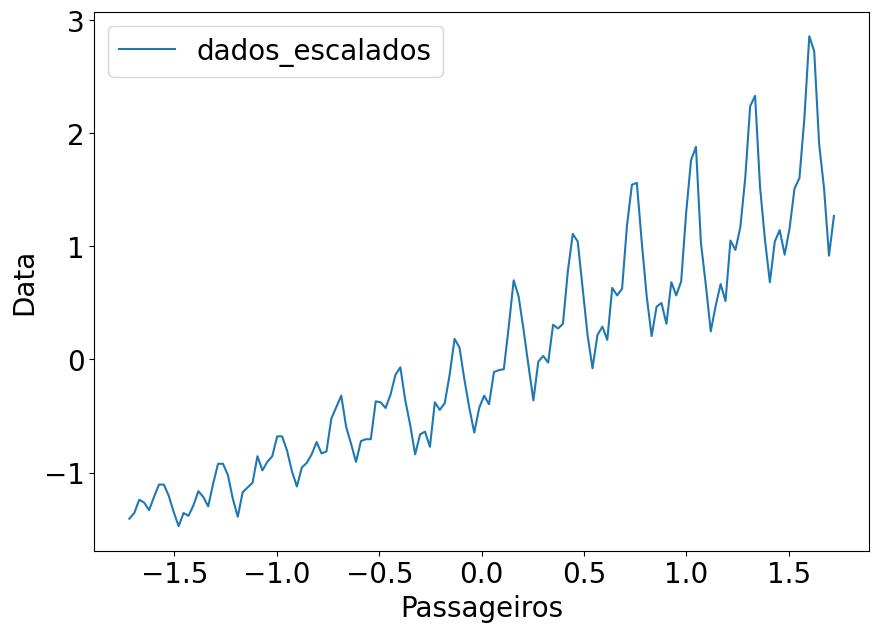

In [11]:
sns.lineplot(x=x, y=y, label='dados_escalados')
plt.xlabel('Passageiros')
plt.ylabel('Data')

In [12]:
tam_treino = int(len(passageiros)*0.9)
tam_test = len(passageiros) - tam_treino
tam_treino, tam_test

(129, 15)

<Axes: >

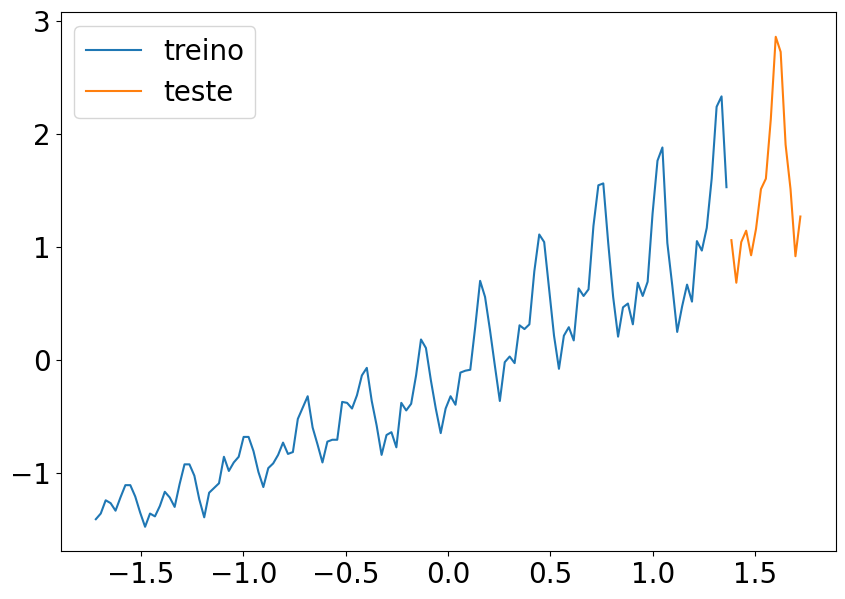

In [13]:
xtrain = x[0:tam_treino]
ytrain = y[0:tam_treino]
xtest = x[tam_treino:len(passageiros)]
ytest = y[tam_treino:len(passageiros)]

sns.lineplot(x=xtrain,y=ytrain,label='treino')
sns.lineplot(x=xtest,y=ytest,label='teste')

In [14]:
model = Sequential()
model.add(Dense(1, input_dim=1,
                kernel_initializer='Ones',
                activation='linear',
                use_bias=True))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

*  input_dim = dimensão da entrada que no caso é só a 'data'.

*  kernel_initializer = inicializando os pesos para transformar data em número de passageiros

*  use_bias = adiciona um peso na fórmula para ajudar nessa conversão



In [15]:
model.fit(xtrain, ytrain, epochs=10, batch_size=64)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1251  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1321 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1295 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1276 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1254 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1212 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1326 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1245 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1252 


In [16]:
y_predict = model.predict(xtrain)
y_predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[-1.6999197 ],
       [-1.6761138 ],
       [-1.6523079 ],
       [-1.628502  ],
       [-1.604696  ],
       [-1.5808902 ],
       [-1.5570842 ],
       [-1.5332783 ],
       [-1.5094725 ],
       [-1.4856665 ],
       [-1.4618607 ],
       [-1.4380547 ],
       [-1.4142488 ],
       [-1.390443  ],
       [-1.366637  ],
       [-1.3428311 ],
       [-1.3190252 ],
       [-1.2952193 ],
       [-1.2714134 ],
       [-1.2476075 ],
       [-1.2238016 ],
       [-1.1999956 ],
       [-1.1761898 ],
       [-1.1523838 ],
       [-1.128578  ],
       [-1.1047721 ],
       [-1.0809661 ],
       [-1.0571603 ],
       [-1.0333543 ],
       [-1.0095484 ],
       [-0.98574257],
       [-0.96193665],
       [-0.93813074],
       [-0.9143249 ],
       [-0.89051896],
       [-0.86671305],
       [-0.84290713],
       [-0.8191012 ],
       [-0.79529536],
       [-0.77148944],
       [-0.7476835 ],
       [-0.7238776 ],
       [-0.7000717 ],
       [-0.6762658 ],
       [-0.6524599 ],
       [-0

<Axes: >

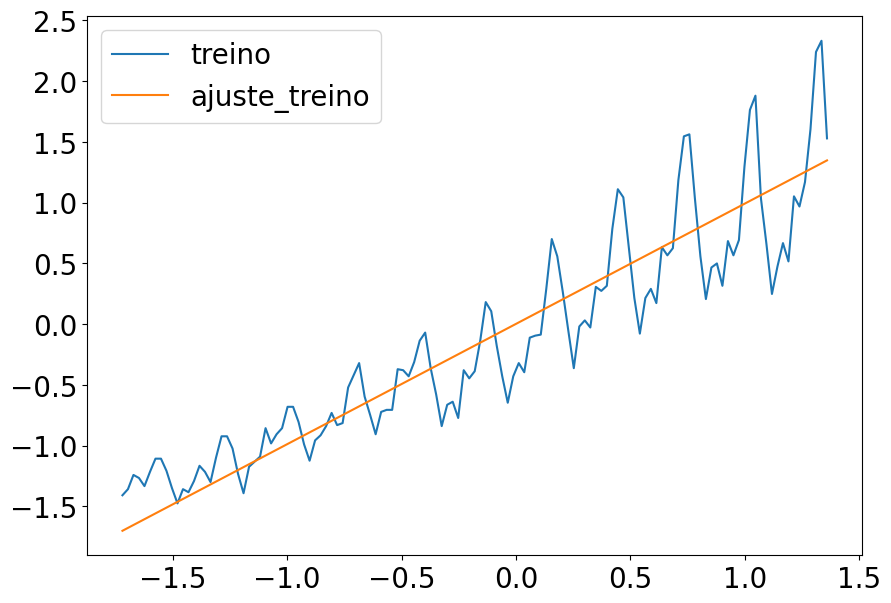

In [17]:
sns.lineplot(x=xtrain, y=ytrain, label='treino')
sns.lineplot(x=xtrain, y=y_predict[:,0], label='ajuste_treino')

In [18]:
d ={'tempo': xtrain,
    'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.699920
1,-1.696007,-1.676114
2,-1.671950,-1.652308
3,-1.647894,-1.628502
4,-1.623837,-1.604696
...,...,...
124,1.262984,1.252012
125,1.287041,1.275818
126,1.311098,1.299624
127,1.335155,1.323430


In [19]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf, columns=['tempo', 'passageiros'])
resultado_transf

,tempo,passageiros
0,1949.000000,77.074840
1,1949.083333,79.920808
2,1949.166667,82.766789
3,1949.250000,85.612757
4,1949.333333,88.458738
...,...,...
124,1959.333333,429.975504
125,1959.416667,432.821486
126,1959.500000,435.667453
127,1959.583333,438.513421


<Axes: xlabel='tempo', ylabel='passageiros'>

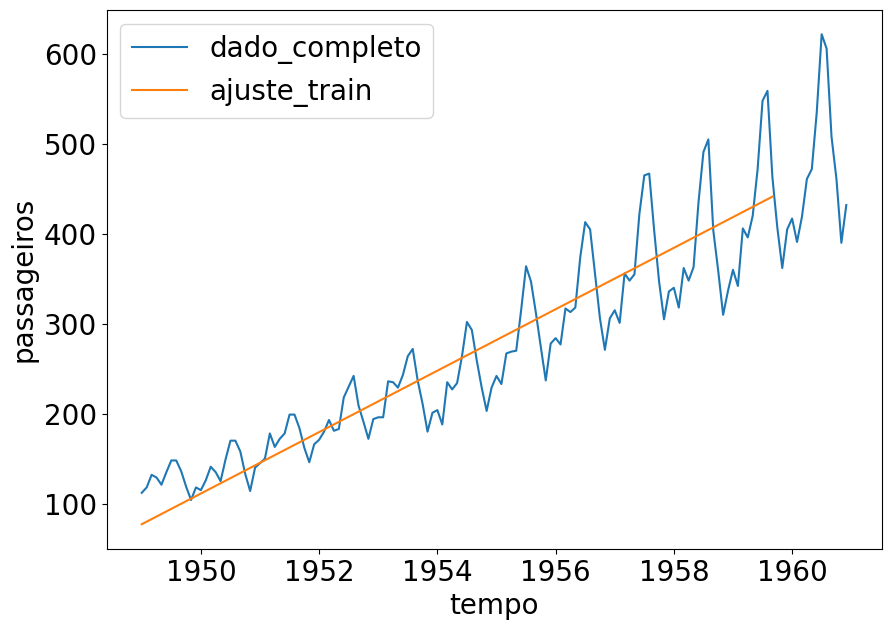

In [20]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_train')

In [21]:
y_predict_test = model.predict(xtest)
#print(y_predict_test)
d ={'tempo': xtest,
    'passageiros': y_predict_test[:,0]}

result_test = pd.DataFrame(data=d)
resultado_test_transf = sc.inverse_transform(result_test)
resultado_test_transf = pd.DataFrame(resultado_test_transf, columns=['tempo', 'passageiros'])
resultado_test_transf

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,tempo,passageiros
0,1959.750000,444.205370
1,1959.833333,447.051351
2,1959.916667,449.897319
3,1960.000000,452.743286
4,1960.083333,455.589268
5,1960.166667,458.435235
6,1960.250000,461.281217
7,1960.333333,464.127184
8,1960.416667,466.973151
9,1960.500000,469.819133


<Axes: xlabel='tempo', ylabel='passageiros'>

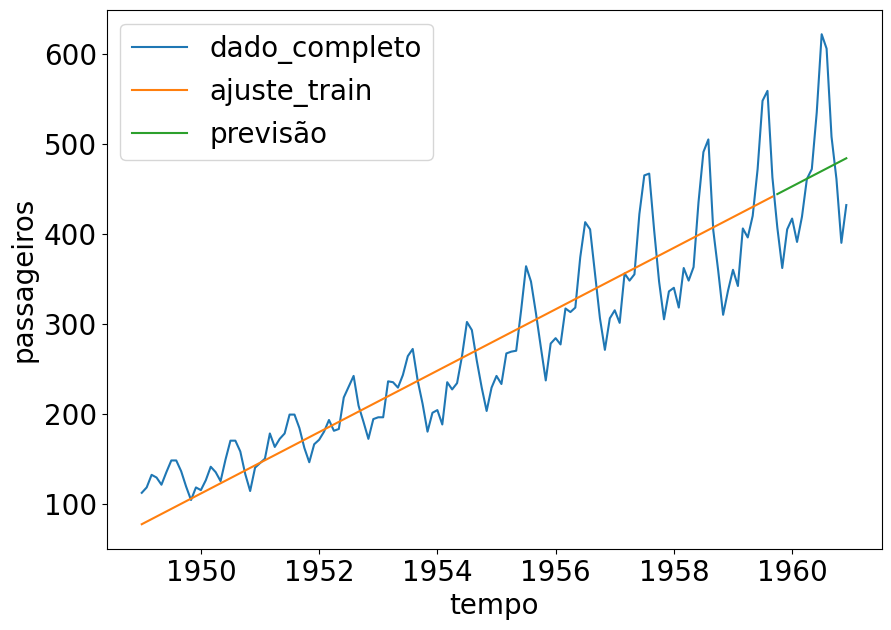

In [22]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_train')
sns.lineplot(x='tempo', y='passageiros', data=resultado_test_transf, label='previsão')

# Hidden layer

In [23]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1,
                     kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

*  random_uniform: distribuição de valores aleatórios

In [24]:
regressor2.fit(xtrain, ytrain, epochs = 200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8516  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7853 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7877 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8054 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8055 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8335 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9049 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7662 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7663 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7281 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7876 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8302 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7881 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7674 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7646 
Epoch 16/200
5/5 ━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<Axes: >

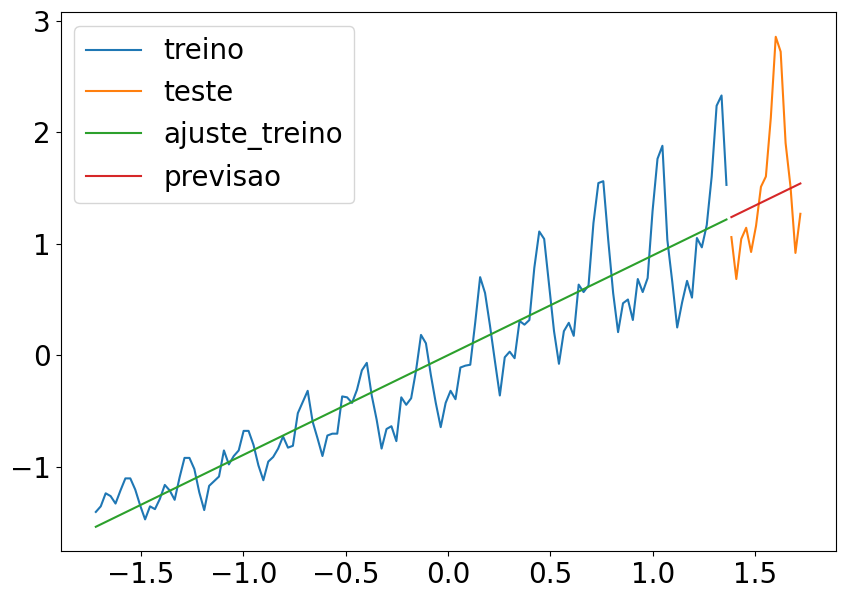

In [25]:
y_predict = regressor2.predict(xtrain)
y_predict_test = regressor2.predict(xtest)

sns.lineplot(x=xtrain, y=ytrain, label='treino')
sns.lineplot(x=xtest, y=ytest, label='teste')
sns.lineplot(x=xtrain, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xtest, y=y_predict_test[:,0], label='previsao')

In [26]:
d = {
    'tempo': xtest,
    'passageiros':y_predict_test[:,0]}


resultados_test_regressor2 = pd.DataFrame(data=d)
resultados_test_regressor2 = sc.inverse_transform(resultados_test_regressor2)
resultados_test_regressor2 = pd.DataFrame(resultados_test_regressor2, columns=['tempo', 'passageiros'])
resultados_test_regressor2

,tempo,passageiros
0,1959.750000,428.456281
1,1959.833333,431.032955
2,1959.916667,433.609600
3,1960.000000,436.186246
4,1960.083333,438.762919
5,1960.166667,441.339564
6,1960.250000,443.916224
7,1960.333333,446.492883
8,1960.416667,449.069529
9,1960.500000,451.646202


<Axes: xlabel='tempo', ylabel='passageiros'>

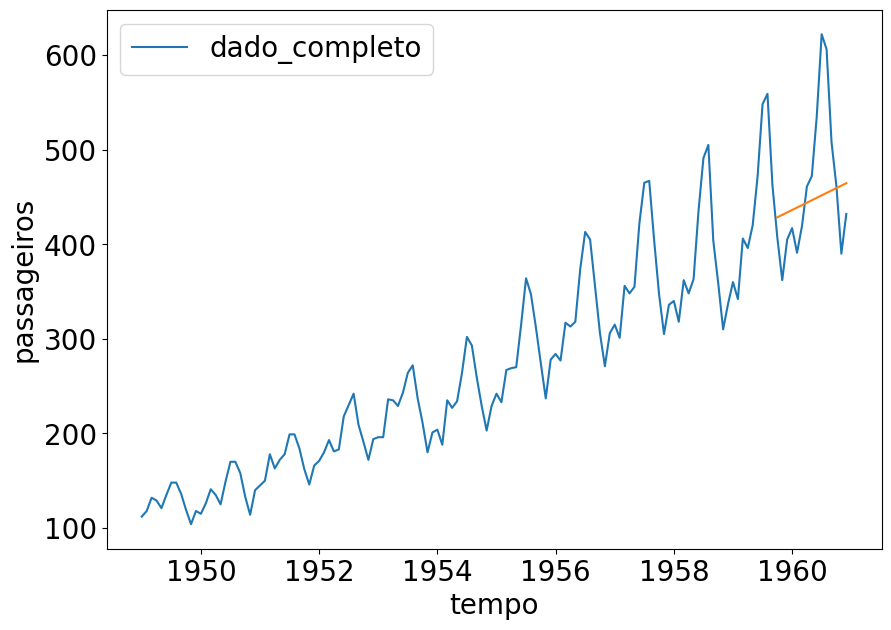

In [27]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_test_regressor2)

In [28]:
def separa_dados(vetor, n_passos):
  x_novo, y_novo = [], []
  for i in range(n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

utilizando y como entrada e saída para prever a saída de acordo com a entrada com atraso. Atraso de um valor anterior.
n_passos = número de passos anteriores no treino. Ex.: 4 = 4 valores anteriores para definir valor de saída.

In [29]:
vetor = pd.DataFrame(ytrain)[0]
x_train_novo, y_train_novo = separa_dados(vetor,1)

In [30]:
x_train_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [31]:
y_train_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [32]:
vetor2 = pd.DataFrame(ytest)[0]
x_test_novo, y_test_novo = separa_dados(vetor2,1)

In [33]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1,
                     kernel_initializer='Ones',
                     activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.fit(x_train_novo, y_train_novo, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9649  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7861 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7414 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6587 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7038 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6837 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6659 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5950 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5659 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5849 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5864 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5012 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5249 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4683 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4757 
Epoch 16/100
4/4 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: xlabel='tempo', ylabel='0'>

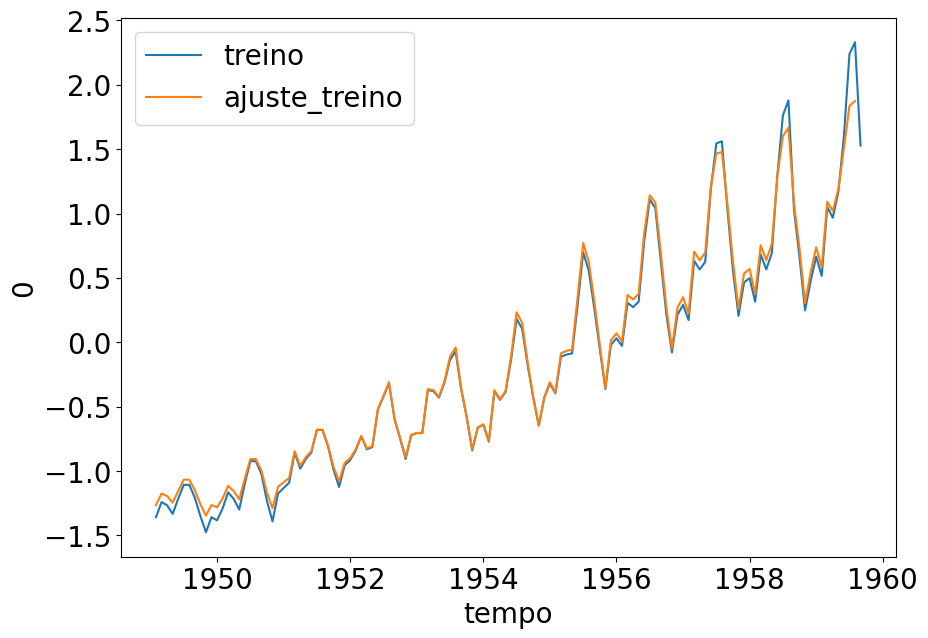

In [34]:
y_predict_novo = regressor3.predict(x_train_novo)
sns.lineplot(x='tempo', y=y_train_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<Axes: xlabel='tempo', ylabel='0'>

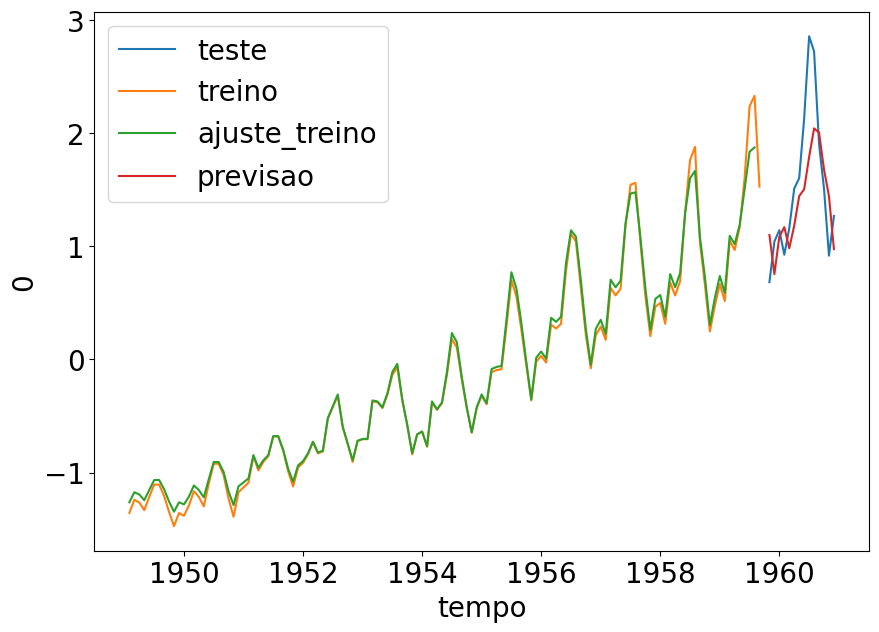

In [35]:
y_predict_teste_novo = regressor3.predict(x_test_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]
sns.lineplot(x='tempo', y=y_test_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=y_train_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')

In [36]:
x_train_novo, y_train_novo = separa_dados(vetor,4)
x_test_novo, y_test_novo = separa_dados(vetor2,4)

regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4,
                     kernel_initializer='Ones',
                     activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.fit(x_train_novo, y_train_novo, epochs = 300)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8971  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7736 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6490 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6517 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5826 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5440 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4387 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3929 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3278 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2822 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2105 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1678 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1743 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1387 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1502 
Epoch 16/300
4/4 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Axes: xlabel='tempo'>

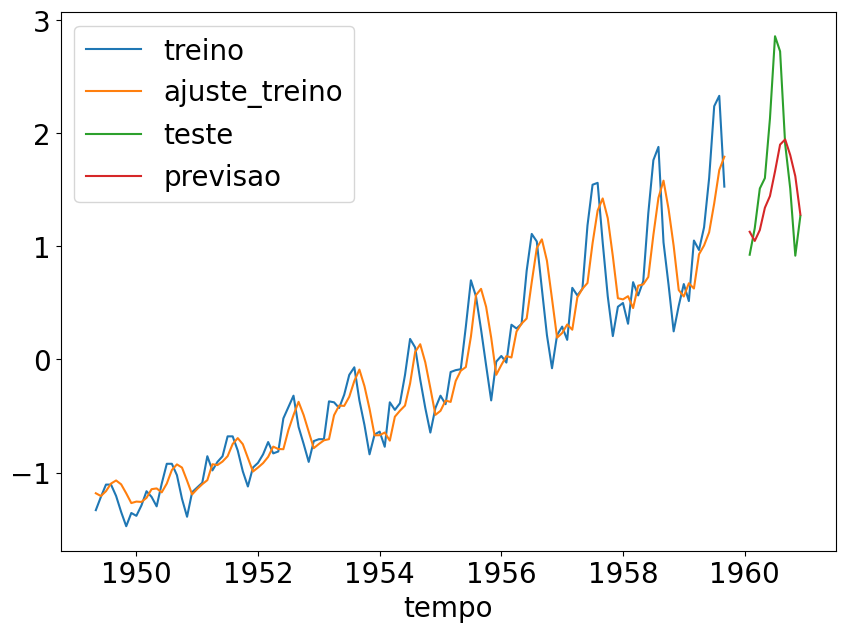

In [37]:
y_predict_novo = regressor4.predict(x_train_novo)
y_predict_teste_novo = regressor4.predict(x_test_novo)
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado_teste = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo', y=y_train_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_test_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado_teste.values, data=passageiros[133:144], label='previsao')



---



# Dados bicicletas

In [38]:
data2 = pd.read_csv('/content/bicicletas.csv')
data2.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

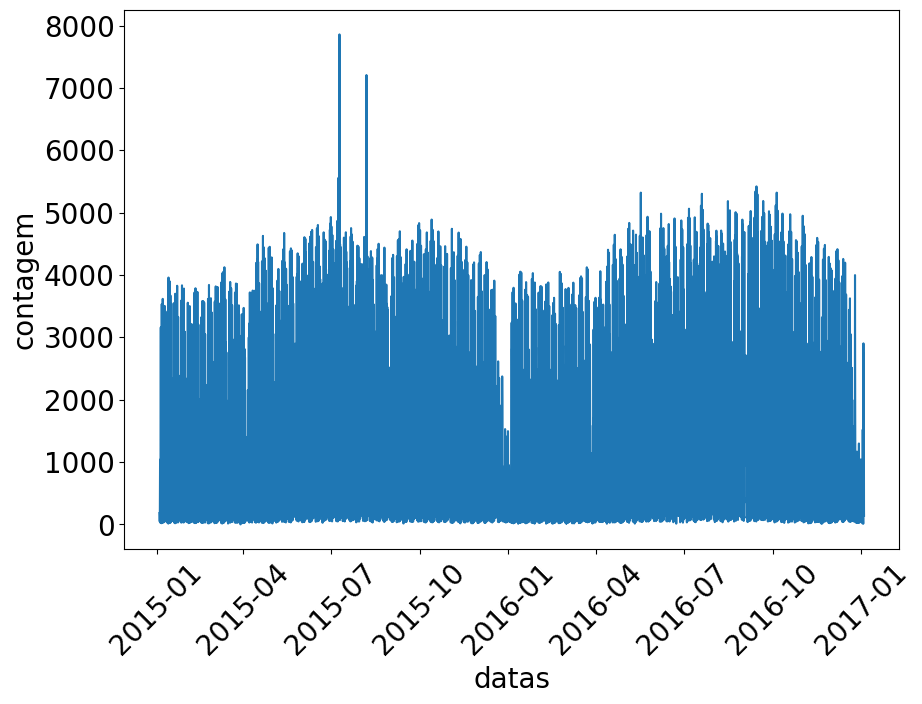

In [39]:
data2['datas'] = pd.to_datetime(data2['datas'])
sns.lineplot(x='datas', y='contagem', data=data2)
plt.xticks(rotation=45)

In [40]:
sc.fit(data2['contagem'].values.reshape(-1,1))
y = sc.transform(data2['contagem'].values.reshape(-1,1))

tam_train = int(len(data2)*0.9)
tam_test = len(data2) - tam_train
tam_train, tam_test

(15672, 1742)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

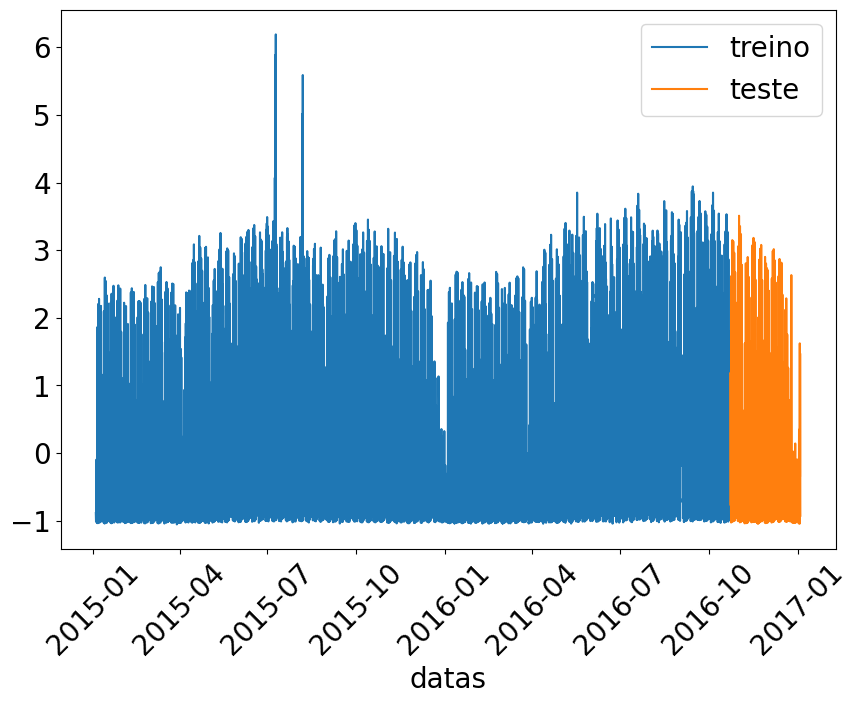

In [41]:
ytrain = y[0:tam_train]
ytest = y[tam_train:len(data2)]

sns.lineplot(x='datas', y=ytrain[:,0], data=data2[0:tam_train], label='treino')
sns.lineplot(x='datas', y=ytest[:,0], data=data2[tam_train:len(data2)], label='teste')
plt.xticks(rotation=45)

In [42]:
# vetor = pd.DataFrame(ytrain[0])
# x_train_novo, y_train_novo = separa_dados(vetor,10)
# vetor2 = pd.DataFrame(ytest[0])
# x_test_novo, y_test_novo = separa_dados(vetor2,10)

x_train_novo = x_train_novo.reshape((x_train_novo.shape[0], x_train_novo.shape[1], 1))
x_test_novo = x_test_novo.reshape((x_test_novo.shape[0], x_test_novo.shape[1], 1))

In [43]:
from tensorflow.keras.layers import LSTM

recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(x_train_novo.shape[1],
                                      x_train_novo.shape[2])))
recorrente.add(Dense(units = 1))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

recorrente.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)


> usar glorot_uniform para atualização dos pesos devido vanishing gradient




In [44]:
result = recorrente.fit(x_train_novo, y_train_novo,
               validation_data=(x_test_novo, y_test_novo), epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.6948 - val_loss: 1.9131
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3964 - val_loss: 1.2781
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2732 - val_loss: 0.9428
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2280 - val_loss: 0.7190
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2000 - val_loss: 0.6380
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1860 - val_loss: 0.6127
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1828 - val_loss: 0.6110
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1795 - val_loss: 0.5905
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1768 - val_loss: 0.5593
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1500 - val_loss: 0.5604
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1737 - val_loss: 0.5377
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1596 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

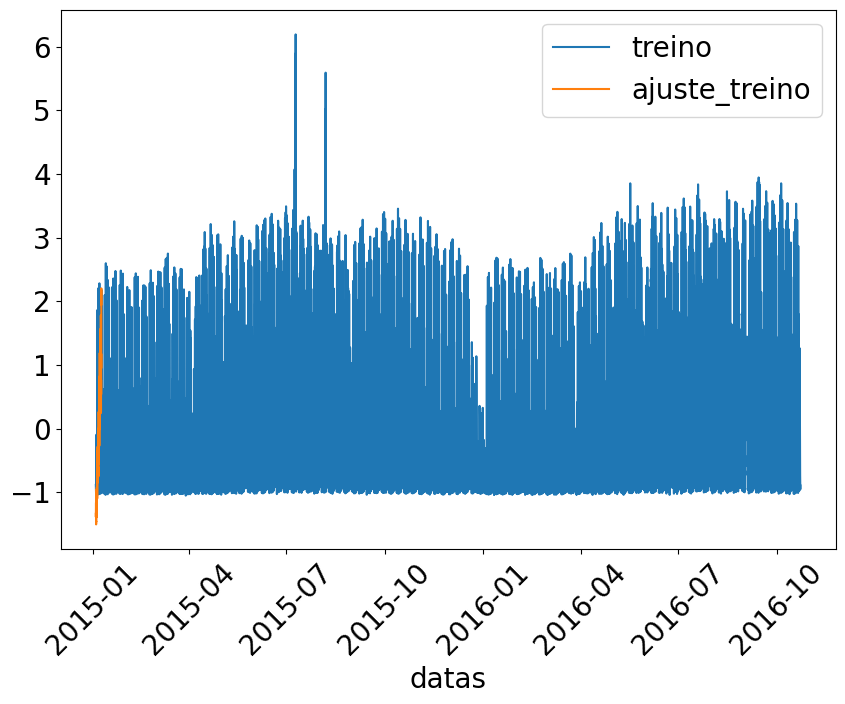

In [50]:
y_ajustado = recorrente.predict(x_train_novo)
sns.lineplot(x='datas', y=ytrain[:,0], data=data2[0:tam_train], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=data2[0:125], label='ajuste_treino')
plt.xticks(rotation=45)

In [46]:
x_train_novo.shape

(125, 4, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 0 and the vector passed to `y` has length 11.

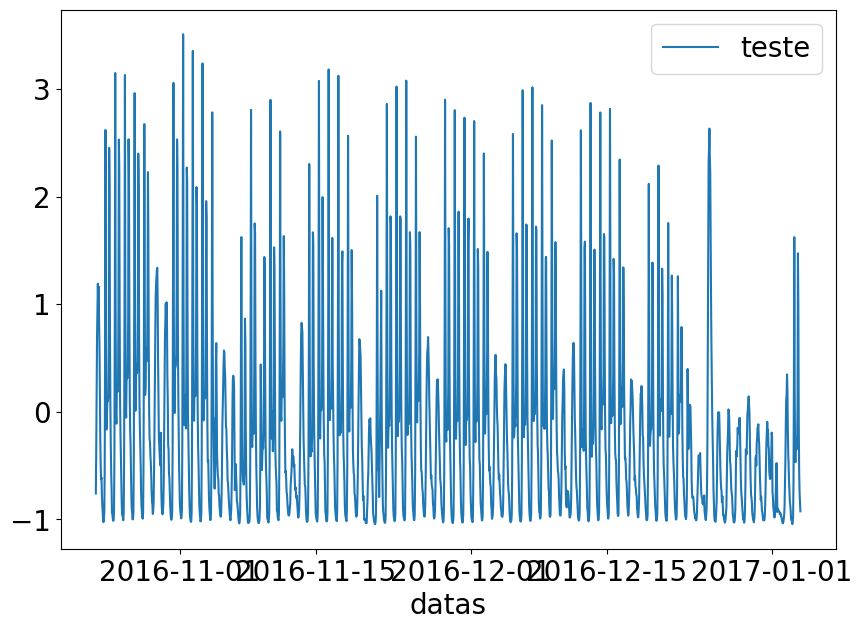

In [57]:
y_predict = recorrente.predict(x_test_novo)

sns.lineplot(x='datas', y=ytest[:,0], data=data2[tam_train:len(data2)], label='teste')
sns.lineplot(x='datas', y=y_predict[:,0], data=data2[tam_train+10:11], label='ajuste_treino')
plt.xticks(rotation=45)

In [59]:
y_predict


array([[1.1510335],
       [0.8441201],
       [1.1871964],
       [1.530999 ],
       [1.4800495],
       [2.0581977],
       [2.6651165],
       [2.013656 ],
       [1.1436664],
       [1.1675137],
       [0.6982408]], dtype=float32)